In [504]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from helpers_plot import finalizePlot, initPlot

In [505]:
initPlot(usetex=False)

In [506]:
#file_all="measurements/Lum1/NNMap/north.N2Map.dat"
file_all="/home/laila/OneDrive/1_Work/5_Projects/12_LowZ_IA/Results/L4/NNMap/all.N2Map.dat"

meas_all=np.loadtxt(file_all)


N_jn=100
Nbins=20
res=np.zeros((N_jn, Nbins))
res_B=np.zeros((N_jn, Nbins))

for i in range(1, N_jn):
    if True: #i != 83:
        file=f"/home/laila/OneDrive/1_Work/5_Projects/12_LowZ_IA/Results/L4/NNMap/jn_{i}.N2Map.dat"
        meas=np.loadtxt(file)[:,3]
        res[i]=meas
        res_B[i]=np.loadtxt(file)[:,4]

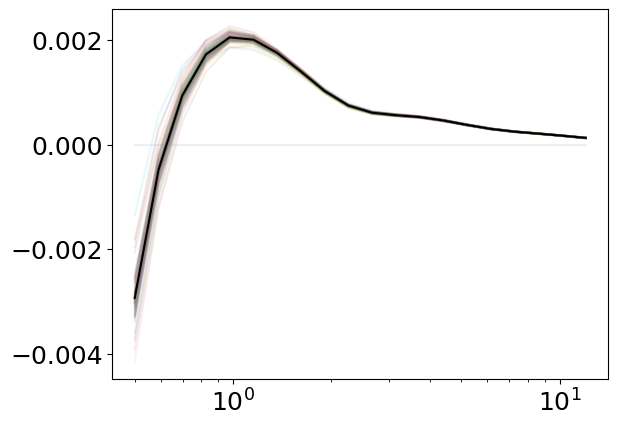

In [507]:
plt.xscale('log')


for i in range(0, N_jn):
     plt.plot(meas_all[:,0],res[i], label=str(i), alpha=0.1)
plt.plot(meas_all[:,0], meas_all[:,3], color='k')
#plt.legend()
#plt.plot(meas_all[:,0], res[99])

In [508]:
jn_samples=np.zeros((N_jn, Nbins))
jn_samples_B=np.zeros((N_jn, Nbins))


for i in range(N_jn):
    jn_samples[i]=np.mean(np.delete(res, i, 0), axis=0)
    jn_samples_B[i]=np.mean(np.delete(res_B, i, 0), axis=0)





#mean=np.mean(res.T, axis=0)
cov=np.cov(res.T)*(N_jn-1)/N_jn
cov_B=np.cov(res_B.T)*(N_jn-1)/N_jn




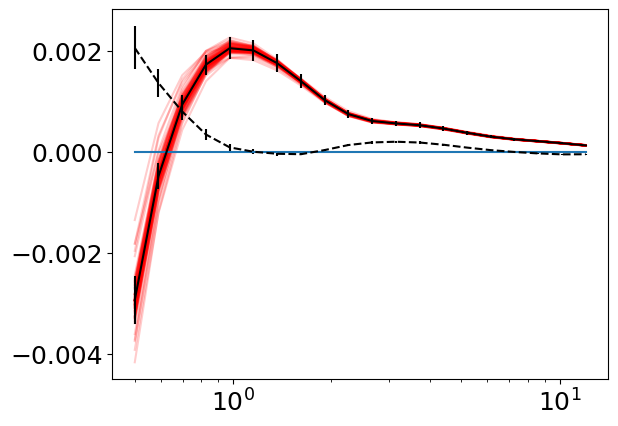

In [509]:

for i in range(0, N_jn):
    plt.plot(meas_all[:,0],res[i], color='r', alpha=0.2)
    #plt.plot(meas_all[:,0],res_B[i], color='r', alpha=0.2, ls='--')



plt.xscale('log')
#plt.yscale('log')
#plt.ylim(1e-2, 5)
plt.errorbar(meas_all[:,0],meas_all[:,3], yerr=np.sqrt(np.diag(cov)), color='k')
plt.errorbar(meas_all[:,0],meas_all[:,4], yerr=np.sqrt(np.diag(cov_B)), color='k', ls='--')

#plt.errorbar(meas_all[:,0],meas_all[:,3], yerr=np.sqrt(np.diag(cov)), color='b')
#plt.errorbar(meas_all[:,0],meas_all[:,4], yerr=np.sqrt(np.diag(cov)), color='g')
plt.plot(meas_all[:,0], np.zeros_like(meas_all[:,0]))


In [510]:
np.mean(res, axis=0).dot(np.linalg.inv(cov)).dot(np.mean(res, axis=0).T)

98.29010184944855

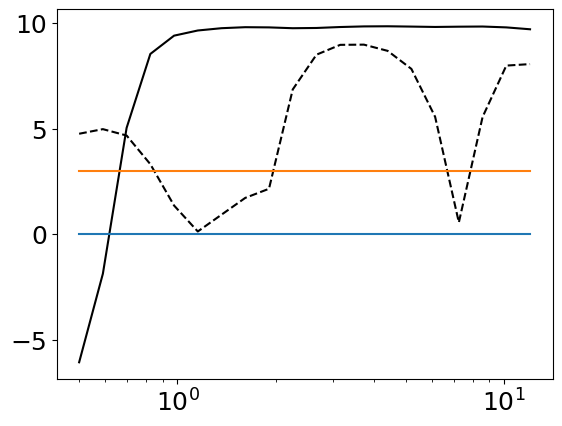

In [511]:
plt.xscale('log')
plt.plot(meas_all[:,0],np.mean(res, axis=0)/np.sqrt(np.diag(cov)), color='k')
plt.plot(meas_all[:,0],np.abs(np.mean(res_B, axis=0))/np.sqrt(np.diag(cov_B)), color='k', ls='--')
plt.plot(meas_all[:,0], np.zeros_like(meas_all[:,0]))
plt.plot(meas_all[:,0], 3*np.ones_like(meas_all[:,0]))



In [512]:
np.sqrt(np.diag(cov))

array([4.80208671e-04, 2.56052187e-04, 1.84336548e-04, 2.00420016e-04,
       2.16187112e-04, 2.06216614e-04, 1.78340497e-04, 1.41609883e-04,
       1.04022520e-04, 7.62526904e-05, 6.23112457e-05, 5.71909586e-05,
       5.35095876e-05, 4.68840508e-05, 3.84293597e-05, 3.08229201e-05,
       2.54553206e-05, 2.16716322e-05, 1.77842179e-05, 1.35570316e-05])

In [513]:
meas_all[:,3]

array([-0.00292656, -0.00047691,  0.00094102,  0.00173103,  0.00205625,
        0.00201239,  0.00175992,  0.00140425,  0.00103051,  0.00075236,
        0.00061546,  0.00056748,  0.00053253,  0.0004669 ,  0.00038215,
        0.00030597,  0.00025302,  0.00021557,  0.00017616,  0.00013306])

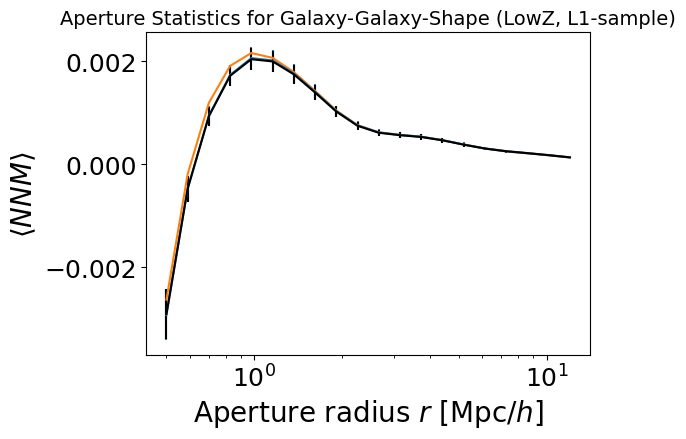

In [514]:
fig, ax=plt.subplots()


ax.set_xscale('log')
#ax.ylim(-0.9,0.9)
#plt.yscale('log')
ax.errorbar(meas_all[:,0], (meas_all[:,3]), yerr=np.sqrt(np.diag(cov)))
plt.errorbar(meas_all[:,0],np.mean(res, axis=0), yerr=np.sqrt(np.diag(cov)), color='k')
plt.plot(meas_all[:,0], res[83])

ax.set_xlabel(r"Aperture radius $r$ [Mpc/$h$]")
ax.set_ylabel(r"$\langle NNM \rangle$")

finalizePlot(ax, "Aperture Statistics for Galaxy-Galaxy-Shape (LowZ, L1-sample)", showlegend=False)


In [515]:
meas_all[:,3]/np.sqrt(np.diag(cov))

array([-6.09435059, -1.86254609,  5.10491821,  8.63701161,  9.51143657,
        9.75862209,  9.86831389,  9.91632764,  9.90660481,  9.86660269,
        9.87722189,  9.92254744,  9.95208568,  9.95867448,  9.94421981,
        9.92683363,  9.93992589,  9.94710496,  9.90535549,  9.81475914])

In [516]:
meas_all[:,0]

array([ 0.5     ,  0.591034,  0.698643,  0.825844,  0.976204,  1.15394 ,
        1.36404 ,  1.61239 ,  1.90595 ,  2.25296 ,  2.66316 ,  3.14804 ,
        3.72119 ,  4.39871 ,  5.19957 ,  6.14625 ,  7.26529 ,  8.58808 ,
       10.1517  , 12.      ])

In [517]:
gtilde_north=np.loadtxt("measurements/gtilde/north.gtilde_single.dat")
gtilde_south=np.loadtxt("measurements/gtilde/south.gtilde_single.dat")
gtilde_all=np.loadtxt("measurements/gtilde/all.gtilde.dat")
gtilde_north.shape
Nbins=50

In [518]:
gtilde_north_real=gtilde_north[:,6]
gtilde_north_imag=gtilde_north[:,7]
gtilde_north_weight=gtilde_north[:,8]


gtilde_north_real=gtilde_north_real.reshape(Nbins, Nbins, Nbins)
gtilde_north_imag=gtilde_north_imag.reshape(Nbins, Nbins, Nbins)
gtilde_north_weight=gtilde_north_weight.reshape(Nbins, Nbins, Nbins)


gtilde_south_real=gtilde_south[:,6]
gtilde_south_imag=gtilde_south[:,7]
gtilde_south_weight=gtilde_south[:,8]


gtilde_south_real=gtilde_south_real.reshape(Nbins, Nbins, Nbins)
gtilde_south_imag=gtilde_south_imag.reshape(Nbins, Nbins, Nbins)
gtilde_south_weight=gtilde_south_weight.reshape(Nbins, Nbins, Nbins)


gtilde_all_real=gtilde_all[:,6]
gtilde_all_imag=gtilde_all[:,7]
gtilde_all_weight=gtilde_all[:,8]


gtilde_all_real=gtilde_all_real.reshape(Nbins, Nbins, Nbins)
gtilde_all_imag=gtilde_all_imag.reshape(Nbins, Nbins, Nbins)
gtilde_all_weight=gtilde_all_weight.reshape(Nbins, Nbins, Nbins)


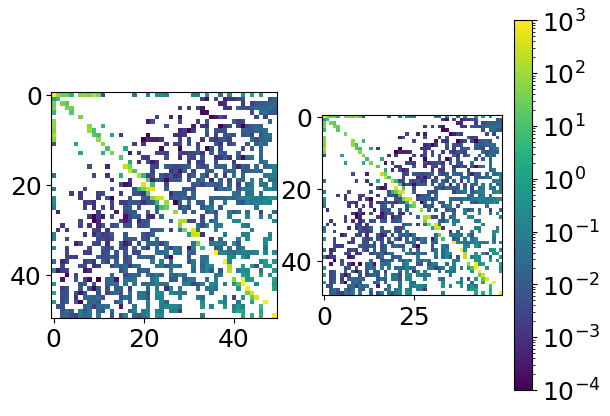

In [519]:
fig, ax = plt.subplots(ncols=2)
phibin=0
ax[0].imshow(gtilde_all_real[:,:,phibin]*gtilde_all_weight[:,:,phibin], norm=mpl.colors.LogNorm(vmin=1e-4, vmax=1e3))
im=ax[1].imshow(gtilde_north_real[:,:,phibin]*gtilde_north_weight[:,:,phibin]+gtilde_south_real[:,:,phibin]*gtilde_south_weight[:,:,phibin], norm=mpl.colors.LogNorm(vmin=1e-4, vmax=1e3))

fig.colorbar(im)



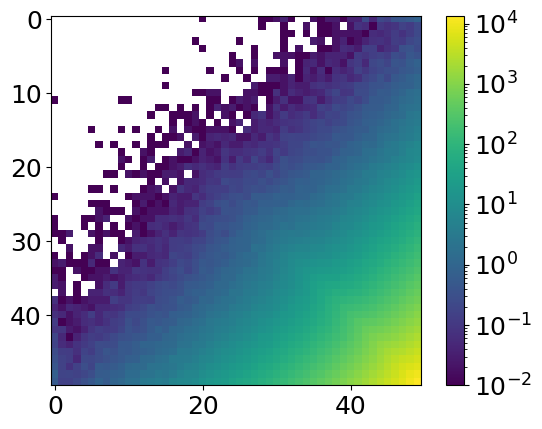

In [520]:
plt.imshow(gtilde_north_weight[:,:,1], norm=mpl.colors.LogNorm())
plt.colorbar()

In [521]:
north=np.loadtxt("measurements/NNMap/north.N2Map.dat")
south=np.loadtxt("measurements/NNMap/south.N2Map.dat")
all=np.loadtxt("measurements/NNMap/all.N2Map.dat")



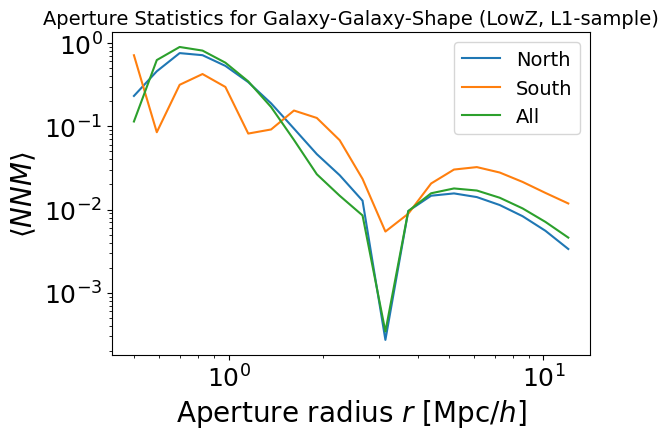

In [522]:
fig, ax=plt.subplots()

ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(north[:,0], np.abs(north[:,3]), label='North')
ax.plot(south[:,0], np.abs(south[:,3]), label='South')
ax.plot(all[:,0], np.abs(all[:,3]), label='All')

ax.hlines(0, min(north[:,0]), max(north[:,0]), color='k')
ax.set_xlabel(r"Aperture radius $r$ [Mpc/$h$]")
ax.set_ylabel(r"$\langle NNM \rangle$")

finalizePlot(ax, "Aperture Statistics for Galaxy-Galaxy-Shape (LowZ, L1-sample)")

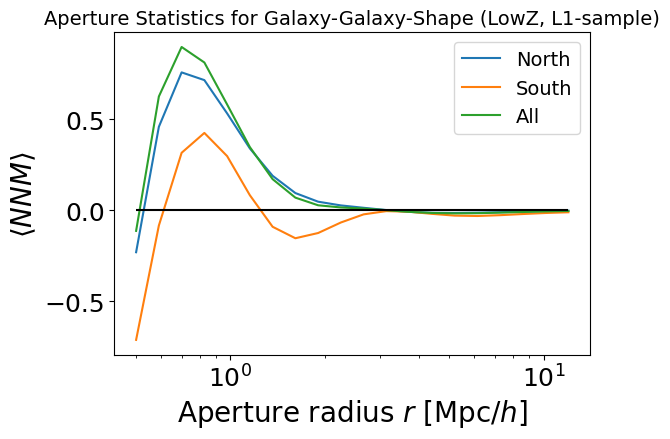

In [523]:
fig, ax=plt.subplots()

#ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(north[:,0], (north[:,3]), label='North')
ax.plot(south[:,0], (south[:,3]), label='South')
ax.plot(all[:,0], (all[:,3]), label='All')
#ax.plot(north[:,0], north[:,3]+south[:,3])

ax.hlines(0, min(north[:,0]), max(north[:,0]), color='k')
ax.set_xlabel(r"Aperture radius $r$ [Mpc/$h$]")
ax.set_ylabel(r"$\langle NNM \rangle$")

finalizePlot(ax, "Aperture Statistics for Galaxy-Galaxy-Shape (LowZ, L1-sample)")

In [524]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd


In [525]:
filename=r"data\north_density.fits"
data = Table.read(filename, format='fits').to_pandas()


FileNotFoundError: [Errno 2] No such file or directory: 'data\\north_density.fits'

In [ ]:
data.head()

,RA,DEC,Z,e1,e2,WEIGHT_FKP,WEIGHT_CP,WEIGHT_NOZ,WEIGHT_STAR,WEIGHT_SEEING,WEIGHT_SYSTOT,Mu_ke0,Mg_ke0,Mr_ke0,Mi_ke0,Mz_ke0,DA,jackknife_ID,X,Y
0,195.211710,-0.505258,0.345888,0.158104,-0.076799,0.227029,1.0,1.0,1.0,1.0,1.0,-999.000000,-20.884115,-21.622444,-22.054237,-22.444876,710.940051,6,119.882099,-361.399158
1,225.586971,-0.046532,0.332610,0.107626,0.033516,0.226787,1.0,1.0,1.0,1.0,1.0,-19.535934,-20.940083,-21.751516,-22.148893,-22.532366,692.738176,21,484.062405,-346.600160
2,225.513692,-0.190260,0.332531,-0.055152,-0.128687,0.227034,1.0,1.0,1.0,1.0,1.0,-999.000000,-20.736992,-21.573034,-21.956991,-22.253622,692.627276,21,483.101583,-348.282145
3,195.095915,-1.063041,0.248512,-0.085485,0.213857,0.236770,1.0,1.0,1.0,1.0,1.0,-18.734627,-21.157776,-21.927965,-22.281872,-22.573008,563.920793,6,93.963805,-292.153261
4,195.210161,-1.064036,0.309910,0.173232,-0.271560,0.241339,1.0,1.0,1.0,1.0,1.0,-18.952906,-21.366879,-22.089720,-22.421467,-22.715347,660.334281,6,111.345734,-342.114139


In [ ]:
dataJN0=data[data["jackknife_ID"]==7]

len(dataJN0)

1434